<a href="https://colab.research.google.com/github/woonkirov/section-project/blob/main/AI_07_%EC%9D%B4%EA%B8%B0%ED%95%9C_Section_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#!pip uninstall scikit-learn -y
#!pip install -U scikit-learn
#!pip install category_encoders
#!pip install -U pandas-profiling
#!pip install kaggle

In [ ]:
#from google.colab import files
#files.upload()

In [ ]:
#!mkdir -p ~/.kaggle
#!cp kaggle.json ~/.kaggle/
#!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
#!kaggle datasets download -d threnjen/2019-airline-delays-and-cancellations

In [ ]:
#!unzip 2019-airline-delays-and-cancellations.zip

In [ ]:
import pandas as pd

df=pd.read_csv('train_test.csv')
df

,MONTH,DAY_OF_WEEK,DEP_DEL15,DISTANCE_GROUP,DEP_BLOCK,SEGMENT_NUMBER,CONCURRENT_FLIGHTS,NUMBER_OF_SEATS,CARRIER_NAME,AIRPORT_FLIGHTS_MONTH,AIRLINE_FLIGHTS_MONTH,AIRLINE_AIRPORT_FLIGHTS_MONTH,AVG_MONTHLY_PASS_AIRPORT,AVG_MONTHLY_PASS_AIRLINE,FLT_ATTENDANTS_PER_PASS,GROUND_SERV_PER_PASS,PLANE_AGE,DEPARTING_AIRPORT,LATITUDE,LONGITUDE,PREVIOUS_AIRPORT,PRCP,SNOW,SNWD,TMAX,AWND
0,1,7,0,2,MORNING,1,109,143,Southwest Airlines Co.,13056,107363,5873,1903352,13382999,0.000062,0.000099,8,McCarran International,36.080,-115.152,NONE,0.00,0.0,0.0,65.0,2.91
1,1,7,0,7,MORNING,1,109,191,Delta Air Lines Inc.,13056,73508,1174,1903352,12460183,0.000144,0.000149,3,McCarran International,36.080,-115.152,NONE,0.00,0.0,0.0,65.0,2.91
2,1,7,0,7,MORNING,1,109,199,Delta Air Lines Inc.,13056,73508,1174,1903352,12460183,0.000144,0.000149,18,McCarran International,36.080,-115.152,NONE,0.00,0.0,0.0,65.0,2.91
3,1,7,0,9,MORNING,1,109,180,Delta Air Lines Inc.,13056,73508,1174,1903352,12460183,0.000144,0.000149,2,McCarran International,36.080,-115.152,NONE,0.00,0.0,0.0,65.0,2.91
4,1,7,0,7,EARLY_MORNING,1,10,182,Spirit Air Lines,13056,15023,1257,1903352,2688839,0.000009,0.000125,1,McCarran International,36.080,-115.152,NONE,0.00,0.0,0.0,65.0,2.91
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6538716,12,7,0,1,LATE_NIGHT,11,6,123,Hawaiian Airlines Inc.,1318,7268,757,133573,905990,0.000120,0.000198,18,Lihue Airport,21.979,-159.346,Honolulu International,0.06,0.0,0.0,84.0,15.21
6538717,12,7,0,1,EVENING,11,8,123,Hawaiian Airlines Inc.,1318,7268,757,133573,905990,0.000120,0.000198,16,Lihue Airport,21.979,-159.346,Honolulu International,0.06,0.0,0.0,84.0,15.21
6538718,12,7,0,1,EVENING,11,8,123,Hawaiian Airlines Inc.,1318,7268,757,133573,905990,0.000120,0.000198,18,Lihue Airport,21.979,-159.346,Honolulu International,0.06,0.0,0.0,84.0,15.21
6538719,12,7,0,1,LATE_NIGHT,12,6,123,Hawaiian Airlines Inc.,1318,7268,757,133573,905990,0.000120,0.000198,18,Lihue Airport,21.979,-159.346,Honolulu International,0.06,0.0,0.0,84.0,15.21


In [ ]:
df_sample = df.sample(frac=0.25, random_state=42)
df_sample
# 데이터의 크기가 너무 커서 학습 진행 시 세션이 다운 되어 크기를 줄였습니다.

,MONTH,DAY_OF_WEEK,DEP_DEL15,DISTANCE_GROUP,DEP_BLOCK,SEGMENT_NUMBER,CONCURRENT_FLIGHTS,NUMBER_OF_SEATS,CARRIER_NAME,AIRPORT_FLIGHTS_MONTH,AIRLINE_FLIGHTS_MONTH,AIRLINE_AIRPORT_FLIGHTS_MONTH,AVG_MONTHLY_PASS_AIRPORT,AVG_MONTHLY_PASS_AIRLINE,FLT_ATTENDANTS_PER_PASS,GROUND_SERV_PER_PASS,PLANE_AGE,DEPARTING_AIRPORT,LATITUDE,LONGITUDE,PREVIOUS_AIRPORT,PRCP,SNOW,SNWD,TMAX,AWND
544773,2,4,1,3,MIDDAY,4,177,160,American Airlines Inc.,20700,70199,10835,2907365,11744595,0.000098,0.000177,7,Dallas Fort Worth Regional,32.894,-97.030,Austin - Bergstrom International,0.04,0.0,0.0,52.0,7.83
1961409,4,2,0,8,EVENING,5,29,182,Spirit Air Lines,3815,16316,148,344196,2688839,0.000009,0.000125,1,Port Columbus International,39.991,-82.878,Tampa International,0.01,0.0,0.0,58.0,8.05
6487837,12,1,0,1,EVENING,7,12,90,Comair Inc.,1316,24003,350,121022,1245396,0.000000,0.000090,4,Savannah/Hilton Head International,32.127,-81.202,Douglas Municipal,0.21,0.0,0.0,72.0,9.62
4665575,8,1,0,3,EVENING,6,156,44,American Eagle Airlines Inc.,19791,28893,405,2006675,1204766,0.000348,0.000107,17,Douglas Municipal,35.219,-80.936,Piedmont Triad International,0.00,0.0,0.0,88.0,2.68
2946570,6,2,0,2,AFTERNOON,3,116,129,Atlantic Southeast Airlines,14546,9184,2297,1690031,473794,0.000000,0.000200,11,Houston Intercontinental,29.983,-95.340,Corpus Christi International,0.01,0.0,0.0,91.0,12.08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106407,1,4,0,3,AFTERNOON,2,23,129,Atlantic Southeast Airlines,3689,12231,149,389847,473794,0.000000,0.000200,11,Indianapolis Muni/Weir Cook,39.729,-86.282,Houston Intercontinental,0.00,0.0,0.0,42.0,7.38
2332366,5,3,0,1,MORNING,1,139,99,American Airlines Inc.,12849,78894,2238,1472200,11744595,0.000098,0.000177,12,Logan International,42.364,-71.006,NONE,0.00,0.0,0.0,61.0,9.17
195410,1,6,0,1,EVENING,1,16,143,Southwest Airlines Co.,4845,107363,2782,614236,13382999,0.000062,0.000099,15,San Jose International,37.363,-121.941,NONE,0.00,0.0,0.0,64.0,6.49
4586170,8,3,0,2,MORNING,3,84,100,JetBlue Airways,9144,25270,169,1093478,3190369,0.000160,0.000127,13,Friendship International,39.176,-76.671,Logan International,0.03,0.0,0.0,88.0,5.14


In [ ]:
df.MONTH.value_counts(normalize=True)

8     0.177262
7     0.088426
10    0.085847
5     0.085342
6     0.085189
3     0.084744
12    0.084404
4     0.081619
11    0.081345
1     0.076781
2     0.069041
Name: MONTH, dtype: float64

In [ ]:
df_sample.MONTH.value_counts(normalize=True)

8     0.177494
7     0.088387
10    0.085994
5     0.085434
6     0.085245
3     0.084741
12    0.084256
4     0.081547
11    0.081047
1     0.076717
2     0.069138
Name: MONTH, dtype: float64

In [ ]:
from scipy import stats

stats.ttest_ind(df.MONTH, df_sample.MONTH).pvalue

0.6408285701252596

In [ ]:
df_sample.isnull().sum() # 결측치 없음

MONTH                            0
DAY_OF_WEEK                      0
DEP_DEL15                        0
DISTANCE_GROUP                   0
DEP_BLOCK                        0
SEGMENT_NUMBER                   0
CONCURRENT_FLIGHTS               0
NUMBER_OF_SEATS                  0
CARRIER_NAME                     0
AIRPORT_FLIGHTS_MONTH            0
AIRLINE_FLIGHTS_MONTH            0
AIRLINE_AIRPORT_FLIGHTS_MONTH    0
AVG_MONTHLY_PASS_AIRPORT         0
AVG_MONTHLY_PASS_AIRLINE         0
FLT_ATTENDANTS_PER_PASS          0
GROUND_SERV_PER_PASS             0
PLANE_AGE                        0
DEPARTING_AIRPORT                0
LATITUDE                         0
LONGITUDE                        0
PREVIOUS_AIRPORT                 0
PRCP                             0
SNOW                             0
SNWD                             0
TMAX                             0
AWND                             0
dtype: int64

In [ ]:
df_sample.duplicated().sum()

43408

In [ ]:
df1 = df_sample.drop_duplicates().reset_index(drop=True)
df1 # 중복값 제거

,MONTH,DAY_OF_WEEK,DEP_DEL15,DISTANCE_GROUP,DEP_BLOCK,SEGMENT_NUMBER,CONCURRENT_FLIGHTS,NUMBER_OF_SEATS,CARRIER_NAME,AIRPORT_FLIGHTS_MONTH,AIRLINE_FLIGHTS_MONTH,AIRLINE_AIRPORT_FLIGHTS_MONTH,AVG_MONTHLY_PASS_AIRPORT,AVG_MONTHLY_PASS_AIRLINE,FLT_ATTENDANTS_PER_PASS,GROUND_SERV_PER_PASS,PLANE_AGE,DEPARTING_AIRPORT,LATITUDE,LONGITUDE,PREVIOUS_AIRPORT,PRCP,SNOW,SNWD,TMAX,AWND
0,2,4,1,3,MIDDAY,4,177,160,American Airlines Inc.,20700,70199,10835,2907365,11744595,0.000098,0.000177,7,Dallas Fort Worth Regional,32.894,-97.030,Austin - Bergstrom International,0.04,0.0,0.0,52.0,7.83
1,4,2,0,8,EVENING,5,29,182,Spirit Air Lines,3815,16316,148,344196,2688839,0.000009,0.000125,1,Port Columbus International,39.991,-82.878,Tampa International,0.01,0.0,0.0,58.0,8.05
2,12,1,0,1,EVENING,7,12,90,Comair Inc.,1316,24003,350,121022,1245396,0.000000,0.000090,4,Savannah/Hilton Head International,32.127,-81.202,Douglas Municipal,0.21,0.0,0.0,72.0,9.62
3,8,1,0,3,EVENING,6,156,44,American Eagle Airlines Inc.,19791,28893,405,2006675,1204766,0.000348,0.000107,17,Douglas Municipal,35.219,-80.936,Piedmont Triad International,0.00,0.0,0.0,88.0,2.68
4,6,2,0,2,AFTERNOON,3,116,129,Atlantic Southeast Airlines,14546,9184,2297,1690031,473794,0.000000,0.000200,11,Houston Intercontinental,29.983,-95.340,Corpus Christi International,0.01,0.0,0.0,91.0,12.08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1591267,5,2,1,4,EVENING,1,85,191,Delta Air Lines Inc.,14570,85579,2695,1208249,12460183,0.000144,0.000149,0,LaGuardia,40.779,-73.876,NONE,0.19,0.0,0.0,71.0,9.17
1591268,1,4,0,3,AFTERNOON,2,23,129,Atlantic Southeast Airlines,3689,12231,149,389847,473794,0.000000,0.000200,11,Indianapolis Muni/Weir Cook,39.729,-86.282,Houston Intercontinental,0.00,0.0,0.0,42.0,7.38
1591269,5,3,0,1,MORNING,1,139,99,American Airlines Inc.,12849,78894,2238,1472200,11744595,0.000098,0.000177,12,Logan International,42.364,-71.006,NONE,0.00,0.0,0.0,61.0,9.17
1591270,1,6,0,1,EVENING,1,16,143,Southwest Airlines Co.,4845,107363,2782,614236,13382999,0.000062,0.000099,15,San Jose International,37.363,-121.941,NONE,0.00,0.0,0.0,64.0,6.49


In [ ]:
from pandas_profiling import ProfileReport

profile = ProfileReport(df1, minimal=True).to_notebook_iframe()
profile

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [ ]:
#baseline, 불균형 지표를 가진 분류모델입니다.
#accuracy뿐만 아니라 precision, recall, f1 score, ROC도 확인해야 할 것입니다.
target='DEP_DEL15'

df1[target].value_counts(normalize=True)

0    0.804612
1    0.195388
Name: DEP_DEL15, dtype: float64

In [ ]:
df1.dtypes

MONTH                              int64
DAY_OF_WEEK                        int64
DEP_DEL15                          int64
DISTANCE_GROUP                     int64
DEP_BLOCK                         object
SEGMENT_NUMBER                     int64
CONCURRENT_FLIGHTS                 int64
NUMBER_OF_SEATS                    int64
CARRIER_NAME                      object
AIRPORT_FLIGHTS_MONTH              int64
AIRLINE_FLIGHTS_MONTH              int64
AIRLINE_AIRPORT_FLIGHTS_MONTH      int64
AVG_MONTHLY_PASS_AIRPORT           int64
AVG_MONTHLY_PASS_AIRLINE           int64
FLT_ATTENDANTS_PER_PASS          float64
GROUND_SERV_PER_PASS             float64
PLANE_AGE                          int64
DEPARTING_AIRPORT                 object
LATITUDE                         float64
LONGITUDE                        float64
PREVIOUS_AIRPORT                  object
PRCP                             float64
SNOW                             float64
SNWD                             float64
TMAX            

MONTH:				Month / 항공편 월자(1월~12월)

DAY_OF_WEEK:			Day of Week / 항공편 일자(1~7)

DEP_DEL15: 			TARGET Binary of a departure delay over 15 minutes (1 is yes) / 항공편이 15분 이상 지연 되었는지(타겟)

DISTANCE_GROUP:			Distance group to be flown by departing aircraft / 비행거리(그룹화)

DEP_BLOCK:			Departure block / 항공편 출발 시간대(이른 아침 ~ 늦은밤, 그룹화)

SEGMENT_NUMBER:			/ (하루동안 사용된 항공편 꼬리번호. 항공편이 하루에 몇번 운행되었는지로 이해하면 될 것 같습니다)

CONCURRENT_FLIGHTS:		Concurrent flights leaving from the airport in the same departure block / 공항 내 동일한 출발 구역에서 출발하는 동시 항공편의 개수

NUMBER_OF_SEATS:		Number of seats on the aircraft / 항공기 좌석 개수

CARRIER_NAME:			Carrier / 항공사 이름

AIRPORT_FLIGHTS_MONTH:		Avg Airport Flights per Month / 월별 공항 평균 비행거리

AIRLINE_FLIGHTS_MONTH:		Avg Airline Flights per Month / 월별 항공사 평균 비행거리

AIRLINE_AIRPORT_FLIGHTS_MONTH:	Avg Flights per month for Airline AND Airport / 월별 항공사 & 공항 평균 비행거리

AVG_MONTHLY_PASS_AIRPORT:	Avg Passengers for the departing airport for the month / 월별 평균 공항 이용객 수

AVG_MONTHLY_PASS_AIRLINE:	Avg Passengers for airline for month / 월별 항공사 이용 고객 수

FLT_ATTENDANTS_PER_PASS:	Flight attendants per passenger for airline / 항공사별 이용객 수당 승무원 수

GROUND_SERV_PER_PASS:		Ground service employees (service desk) per passenger for airline / 이용객 수당 항공사 데스크 직원 수

PLANE_AGE:			Age of departing aircraft / 항공기 수명

DEPARTING_AIRPORT:		Departing Airport / 출발 공항

LATITUDE:			Latitude of departing airport / 위도

LONGITUDE:			Longitude of departing airport / 경도

PREVIOUS_AIRPORT:		Previous airport that aircraft departed from / 항공기가 출발한 이전 공항

PRCP:				Inches of precipitation for day / 강수량(인치)

SNOW:				Inches of snowfall for day / 강설량(인치)

SNWD:				Inches of snow on ground for day / 적설량(인치)

TMAX:				Max temperature for day / 일 최고 기온

AWND:				Max wind speed for day / 일 최고 풍속


In [ ]:
location=['DEPARTING_AIRPORT', 'LATITUDE', 'LONGITUDE']
df1[location]
# 출발 공항의 위치입니다.
# 위도, 경도로도 공항명을 알 수 있습니다.
# 변수로 저장만 해놓고 학습에는 공항명만 사용하겠습니다.

,DEPARTING_AIRPORT,LATITUDE,LONGITUDE
0,Dallas Fort Worth Regional,32.894,-97.030
1,Port Columbus International,39.991,-82.878
2,Savannah/Hilton Head International,32.127,-81.202
3,Douglas Municipal,35.219,-80.936
4,Houston Intercontinental,29.983,-95.340
...,...,...,...
1591267,LaGuardia,40.779,-73.876
1591268,Indianapolis Muni/Weir Cook,39.729,-86.282
1591269,Logan International,42.364,-71.006
1591270,San Jose International,37.363,-121.941


In [ ]:
# 'AIRPORT_FLIGHTS_MONTH', 'AIRLINE_FLIGHTS_MONTH' 특성은 'AIRLINE_AIRPORT_FLIGHTS_MONTH'로 나타낼 수 있기 때문에 제거하겠습니다.
df2 = df1.drop(['LATITUDE', 'LONGITUDE', 'AIRPORT_FLIGHTS_MONTH', 'AIRLINE_FLIGHTS_MONTH'], axis = 1)
df2

,MONTH,DAY_OF_WEEK,DEP_DEL15,DISTANCE_GROUP,DEP_BLOCK,SEGMENT_NUMBER,CONCURRENT_FLIGHTS,NUMBER_OF_SEATS,CARRIER_NAME,AIRLINE_AIRPORT_FLIGHTS_MONTH,AVG_MONTHLY_PASS_AIRPORT,AVG_MONTHLY_PASS_AIRLINE,FLT_ATTENDANTS_PER_PASS,GROUND_SERV_PER_PASS,PLANE_AGE,DEPARTING_AIRPORT,PREVIOUS_AIRPORT,PRCP,SNOW,SNWD,TMAX,AWND
0,2,4,1,3,MIDDAY,4,177,160,American Airlines Inc.,10835,2907365,11744595,0.000098,0.000177,7,Dallas Fort Worth Regional,Austin - Bergstrom International,0.04,0.0,0.0,52.0,7.83
1,4,2,0,8,EVENING,5,29,182,Spirit Air Lines,148,344196,2688839,0.000009,0.000125,1,Port Columbus International,Tampa International,0.01,0.0,0.0,58.0,8.05
2,12,1,0,1,EVENING,7,12,90,Comair Inc.,350,121022,1245396,0.000000,0.000090,4,Savannah/Hilton Head International,Douglas Municipal,0.21,0.0,0.0,72.0,9.62
3,8,1,0,3,EVENING,6,156,44,American Eagle Airlines Inc.,405,2006675,1204766,0.000348,0.000107,17,Douglas Municipal,Piedmont Triad International,0.00,0.0,0.0,88.0,2.68
4,6,2,0,2,AFTERNOON,3,116,129,Atlantic Southeast Airlines,2297,1690031,473794,0.000000,0.000200,11,Houston Intercontinental,Corpus Christi International,0.01,0.0,0.0,91.0,12.08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1591267,5,2,1,4,EVENING,1,85,191,Delta Air Lines Inc.,2695,1208249,12460183,0.000144,0.000149,0,LaGuardia,NONE,0.19,0.0,0.0,71.0,9.17
1591268,1,4,0,3,AFTERNOON,2,23,129,Atlantic Southeast Airlines,149,389847,473794,0.000000,0.000200,11,Indianapolis Muni/Weir Cook,Houston Intercontinental,0.00,0.0,0.0,42.0,7.38
1591269,5,3,0,1,MORNING,1,139,99,American Airlines Inc.,2238,1472200,11744595,0.000098,0.000177,12,Logan International,NONE,0.00,0.0,0.0,61.0,9.17
1591270,1,6,0,1,EVENING,1,16,143,Southwest Airlines Co.,2782,614236,13382999,0.000062,0.000099,15,San Jose International,NONE,0.00,0.0,0.0,64.0,6.49


In [ ]:
#!pip install catboost

In [ ]:
X = df2.drop(target, axis=1)
y = df2[target]

In [ ]:
import numpy as np

cat_features = ['DEP_BLOCK', 'CARRIER_NAME', 'DEPARTING_AIRPORT', 'PREVIOUS_AIRPORT']
print(cat_features)

['DEP_BLOCK', 'CARRIER_NAME', 'DEPARTING_AIRPORT', 'PREVIOUS_AIRPORT']


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=1234)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, train_size=0.8, random_state=1234)

In [ ]:
vc = y_train.value_counts().tolist() # sum(negative instances) / sum(positive instances)
ratio = float(vc[0]/vc[1])
vc, ratio # raito = class_weight

([819297, 199116], 4.114671849575122)

In [ ]:
from catboost import CatBoostClassifier
model = CatBoostClassifier(eval_metric='AUC', 
                           use_best_model=True, 
                           task_type="GPU", 
                           scale_pos_weight=ratio
                          )
cb = model.fit(X_train, y_train, cat_features=cat_features, eval_set=(X_val, y_val))

In [ ]:
print('Best Iteration: {}'.format(model.best_iteration_))
print('Training Accuracy: {:.2%}'.format(model.best_score_['learn']['AUC']))
print('Validation Accuracy: {:.2%}'.format(model.best_score_['validation']['AUC']))

Best Iteration: 999
Training Accuracy: 72.19%
Validation Accuracy: 71.88%


In [ ]:
X_test[cat_features] = X_test[cat_features].astype(str)
y_pred = model.predict(X_test)
y_pred

array([0, 1, 1, ..., 0, 1, 0])

In [ ]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.89      0.67      0.76    256173
           1       0.32      0.64      0.43     62082

    accuracy                           0.67    318255
   macro avg       0.60      0.66      0.60    318255
weighted avg       0.78      0.67      0.70    318255



In [ ]:
from catboost import Pool

pd.DataFrame({'feature_importance': model.get_feature_importance(Pool(X_train, y_train, cat_features=cat_features)), 
              'feature_names': X_train.columns}).sort_values(by=['feature_importance'], ascending=False)

,feature_importance,feature_names
3,19.188661,DEP_BLOCK
16,11.597990,PRCP
0,10.294932,MONTH
4,9.908237,SEGMENT_NUMBER
7,7.293308,CARRIER_NAME
19,5.688217,TMAX
14,5.060389,DEPARTING_AIRPORT
1,4.551967,DAY_OF_WEEK
15,4.385929,PREVIOUS_AIRPORT
20,2.999889,AWND


In [ ]:
!pip install pdpbox

In [ ]:
X_train.dtypes

MONTH                              int64
DAY_OF_WEEK                        int64
DISTANCE_GROUP                     int64
DEP_BLOCK                         object
SEGMENT_NUMBER                     int64
CONCURRENT_FLIGHTS                 int64
NUMBER_OF_SEATS                    int64
CARRIER_NAME                      object
AIRLINE_AIRPORT_FLIGHTS_MONTH      int64
AVG_MONTHLY_PASS_AIRPORT           int64
AVG_MONTHLY_PASS_AIRLINE           int64
FLT_ATTENDANTS_PER_PASS          float64
GROUND_SERV_PER_PASS             float64
PLANE_AGE                          int64
DEPARTING_AIRPORT                 object
PREVIOUS_AIRPORT                  object
PRCP                             float64
SNOW                             float64
SNWD                             float64
TMAX                             float64
AWND                             float64
dtype: object

In [ ]:
plt.rcParams['figure.dpi'] = 144

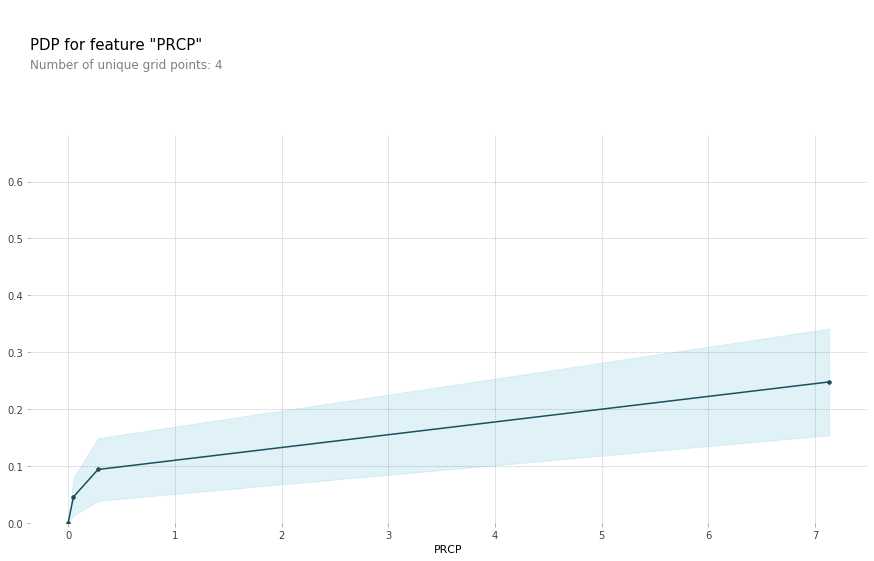

In [ ]:
%matplotlib inline

import matplotlib.pyplot as plt
from pdpbox import pdp

feature = 'PRCP'
features = X_val.columns
pdp_dist = pdp.pdp_isolate(model=model, dataset=X_val, model_features=features, feature=feature)
pdp.pdp_plot(pdp_dist, feature);

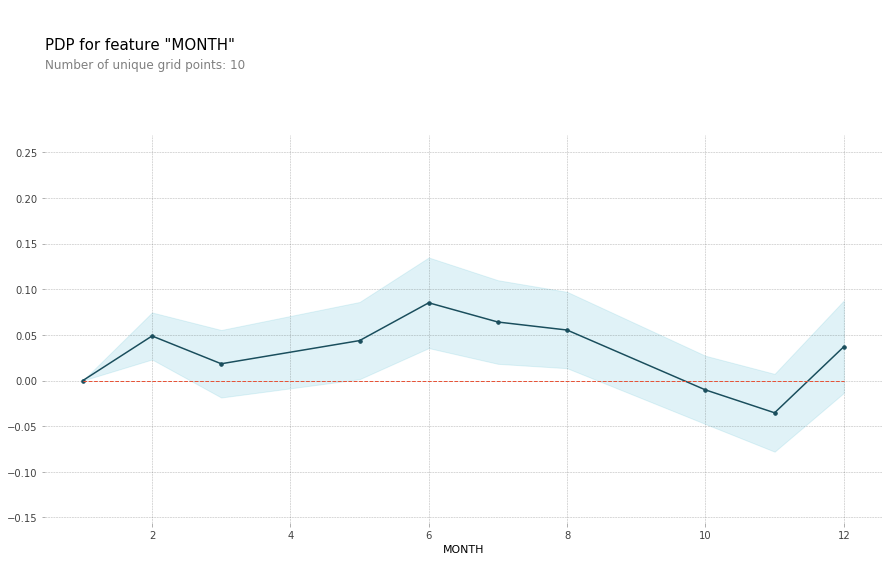

In [ ]:
feature2 = 'MONTH'
features = X_val.columns
pdp_dist = pdp.pdp_isolate(model=model, dataset=X_val, model_features=features, feature=feature2)
pdp.pdp_plot(pdp_dist, feature2);

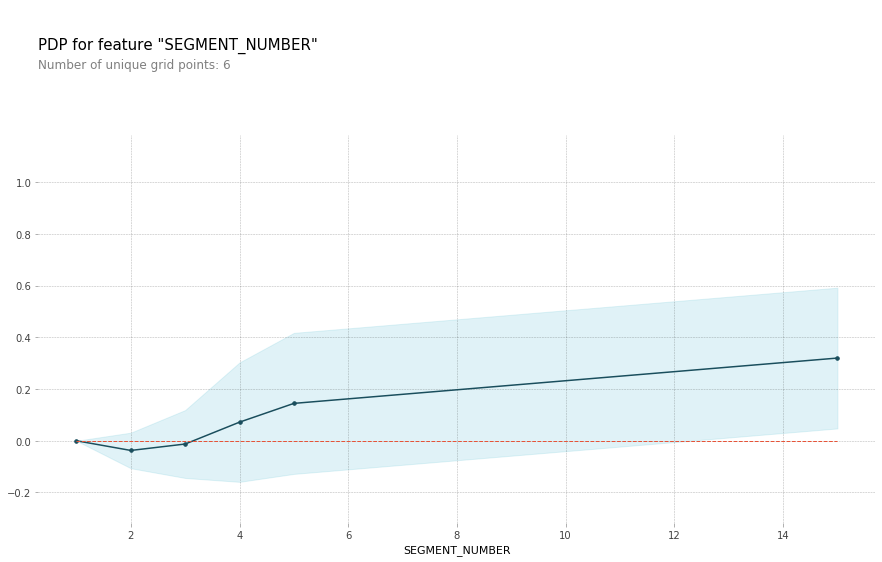

In [ ]:
feature3 = 'SEGMENT_NUMBER'
features = X_val.columns
pdp_dist = pdp.pdp_isolate(model=model, dataset=X_val, model_features=features, feature=feature3)
pdp.pdp_plot(pdp_dist, feature3);

In [ ]:
from pdpbox.pdp import pdp_interact, pdp_interact_plot

features1 = ['PRCP', 'TMAX']

interaction = pdp_interact(model=model, 
                           dataset=X_val, 
                           model_features=X_val.columns, 
                           features=features1
                           )

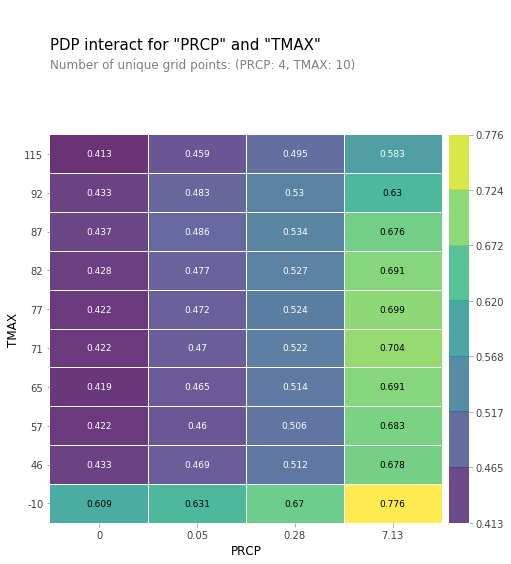

In [ ]:
pdp_interact_plot(interaction, plot_type='grid', 
                  feature_names=features1);

In [ ]:
class_index = 1
y_pred_proba = model.predict_proba(X_test)[:, class_index]
y_pred_proba

array([0.44402536, 0.65945413, 0.5279347 , ..., 0.17941325, 0.58952276,
       0.27560832])

In [ ]:
roc_auc_score(y_test, y_pred_proba)

0.7171899075074126

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.89      0.67      0.76    256173
           1       0.32      0.64      0.43     62082

    accuracy                           0.67    318255
   macro avg       0.60      0.66      0.60    318255
weighted avg       0.78      0.67      0.70    318255



In [ ]:
df_p = pd.DataFrame({'pred_proba': y_pred_proba, 
                    'real':y_test})

df_shap = pd.concat([df_p, X_test], axis = 1)
df_shap

,pred_proba,real,MONTH,DAY_OF_WEEK,DISTANCE_GROUP,DEP_BLOCK,SEGMENT_NUMBER,CONCURRENT_FLIGHTS,NUMBER_OF_SEATS,CARRIER_NAME,AIRLINE_AIRPORT_FLIGHTS_MONTH,AVG_MONTHLY_PASS_AIRPORT,AVG_MONTHLY_PASS_AIRLINE,FLT_ATTENDANTS_PER_PASS,GROUND_SERV_PER_PASS,PLANE_AGE,DEPARTING_AIRPORT,PREVIOUS_AIRPORT,PRCP,SNOW,SNWD,TMAX,AWND
1012583,0.444025,0,12,4,5,AFTERNOON,3,100,191,Delta Air Lines Inc.,1535,1472200,12460183,0.000144,0.000149,0,Logan International,Atlanta Municipal,0.00,0.0,0.0,45.0,13.42
787974,0.659454,1,6,5,8,MIDDAY,2,97,149,Alaska Airlines Inc.,1901,1908862,2884187,0.000032,0.000175,13,San Francisco International,Philadelphia International,0.00,0.0,0.0,70.0,16.78
1087928,0.527935,0,2,1,2,EVENING,6,190,76,Mesa Airlines Inc.,2879,2907365,1191889,0.000000,0.000091,13,Dallas Fort Worth Regional,Truax Field,0.00,0.0,0.0,79.0,8.50
444536,0.360609,0,8,4,2,MORNING,3,50,143,Southwest Airlines Co.,608,404265,13382999,0.000062,0.000099,13,Cleveland-Hopkins International,Chicago Midway International,0.04,0.0,0.0,83.0,4.25
1397296,0.311254,1,5,1,3,AFTERNOON,4,105,110,Delta Air Lines Inc.,5688,1581456,12460183,0.000144,0.000149,19,Minneapolis-St Paul International,Kansas City International,0.00,0.0,0.0,86.0,7.61
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
480993,0.455905,0,3,7,3,EVENING,4,82,66,SkyWest Airlines Inc.,3764,1065782,3472966,0.000034,0.000099,16,Salt Lake City International,Aspen Pitkin County Sardy Field,0.02,0.0,0.0,43.0,5.82
518612,0.117872,0,11,3,1,MORNING,3,31,123,Hawaiian Airlines Inc.,2855,719055,905990,0.000120,0.000198,15,Honolulu International,Lihue Airport,0.00,0.0,0.0,68.0,4.92
585968,0.179413,0,4,2,2,LATE_NIGHT,6,21,76,SkyWest Airlines Inc.,748,1023434,3472966,0.000034,0.000099,3,San Diego International Lindbergh Fl,Fresno Air Terminal,0.00,0.0,0.0,66.0,8.05
766910,0.589523,0,5,2,4,AFTERNOON,5,297,99,American Airlines Inc.,1118,4365661,11744595,0.000098,0.000177,12,Atlanta Municipal,Philadelphia International,0.00,0.0,0.0,73.0,8.28


In [ ]:
no_delay = (df_p['real'] == 0) & (df_p['pred_proba'] > 0.9)
df_no_delay = df_shap[no_delay]
df_no_delay

,pred_proba,real,MONTH,DAY_OF_WEEK,DISTANCE_GROUP,DEP_BLOCK,SEGMENT_NUMBER,CONCURRENT_FLIGHTS,NUMBER_OF_SEATS,CARRIER_NAME,AIRLINE_AIRPORT_FLIGHTS_MONTH,AVG_MONTHLY_PASS_AIRPORT,AVG_MONTHLY_PASS_AIRLINE,FLT_ATTENDANTS_PER_PASS,GROUND_SERV_PER_PASS,PLANE_AGE,DEPARTING_AIRPORT,PREVIOUS_AIRPORT,PRCP,SNOW,SNWD,TMAX,AWND
978654,0.954988,0,6,1,3,LATE_NIGHT,1,76,169,United Air Lines Inc.,6864,3103410,8501631,0.000254,0.000229,24,Chicago O'Hare International,NONE,0.17,0.0,0.0,78.0,9.62
551522,0.913768,0,2,4,3,EVENING,1,76,142,United Air Lines Inc.,3769,1908862,8501631,0.000254,0.000229,23,San Francisco International,NONE,0.94,0.0,0.0,65.0,20.80
135606,0.912720,0,8,2,5,LATE_NIGHT,1,64,145,Spirit Air Lines,950,2907365,2688839,0.000009,0.000125,12,Dallas Fort Worth Regional,NONE,0.00,0.0,0.0,99.0,8.05
558398,0.906113,0,8,3,7,EVENING,1,91,169,United Air Lines Inc.,4733,1708599,8501631,0.000254,0.000229,21,Newark Liberty International,NONE,1.69,0.0,0.0,84.0,4.25
87519,0.942378,0,8,3,3,LATE_NIGHT,1,44,172,American Airlines Inc.,4168,1413432,11744595,0.000098,0.000177,9,Miami International,NONE,1.11,0.0,0.0,91.0,2.91
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
649011,0.957980,0,8,5,5,LATE_NIGHT,1,31,182,Spirit Air Lines,1509,1823051,2688839,0.000009,0.000125,3,Orlando International,NONE,0.39,0.0,0.0,89.0,5.82
595317,0.927663,0,5,4,11,LATE_NIGHT,1,62,169,United Air Lines Inc.,4834,1908862,8501631,0.000254,0.000229,20,San Francisco International,NONE,0.29,0.0,0.0,61.0,15.43
438755,0.950017,0,1,1,3,AFTERNOON,7,86,100,JetBlue Airways,3215,1680928,3190369,0.000160,0.000127,10,John F. Kennedy International,Greater Buffalo International,0.00,0.0,0.0,16.0,26.62
953265,0.926226,0,8,2,9,LATE_NIGHT,1,54,200,JetBlue Airways,341,1903352,3190369,0.000160,0.000127,1,McCarran International,NONE,0.00,0.0,0.0,108.0,6.93


In [ ]:
!pip install shap

     |████████████████████████████████| 371 kB 5.4 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
  Created wheel for shap: filename=shap-0.40.0-cp37-cp37m-linux_x86_64.whl size=509233 sha256=a75222187c36e27b9d2294fdef009145c510425d1eeaca87d55b1c688044e13f
  Stored in directory: /root/.cache/pip/wheels/ec/35/84/e304841ac4b910bc95fe9a6e5302eb2507b4333728851dcbfb
Successfully built shap


In [ ]:
row = X_test[X_test.index == 978654]
row

,MONTH,DAY_OF_WEEK,DISTANCE_GROUP,DEP_BLOCK,SEGMENT_NUMBER,CONCURRENT_FLIGHTS,NUMBER_OF_SEATS,CARRIER_NAME,AIRLINE_AIRPORT_FLIGHTS_MONTH,AVG_MONTHLY_PASS_AIRPORT,AVG_MONTHLY_PASS_AIRLINE,FLT_ATTENDANTS_PER_PASS,GROUND_SERV_PER_PASS,PLANE_AGE,DEPARTING_AIRPORT,PREVIOUS_AIRPORT,PRCP,SNOW,SNWD,TMAX,AWND
978654,6,1,3,LATE_NIGHT,1,76,169,United Air Lines Inc.,6864,3103410,8501631,0.000254,0.000229,24,Chicago O'Hare International,NONE,0.17,0.0,0.0,78.0,9.62


In [ ]:
import shap

explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(row)

shap.initjs()
shap.force_plot(base_value=explainer.expected_value, 
                shap_values=shap_values, 
                features=row, 
                link='logit' # 확률
                )

In [ ]:
row2 = X_test.iloc[[123123]]
row2

,MONTH,DAY_OF_WEEK,DISTANCE_GROUP,DEP_BLOCK,SEGMENT_NUMBER,CONCURRENT_FLIGHTS,NUMBER_OF_SEATS,CARRIER_NAME,AIRLINE_AIRPORT_FLIGHTS_MONTH,AVG_MONTHLY_PASS_AIRPORT,AVG_MONTHLY_PASS_AIRLINE,FLT_ATTENDANTS_PER_PASS,GROUND_SERV_PER_PASS,PLANE_AGE,DEPARTING_AIRPORT,PREVIOUS_AIRPORT,PRCP,SNOW,SNWD,TMAX,AWND
710756,10,7,3,MIDDAY,1,29,160,Delta Air Lines Inc.,306,404265,12460183,0.000144,0.000149,19,Cleveland-Hopkins International,NONE,0.08,0.0,0.0,63.0,14.99


In [ ]:
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(row2)

shap.initjs()
shap.force_plot(base_value=explainer.expected_value, 
                shap_values=shap_values, 
                features=row2, 
                link='logit' # 확률
                )

In [ ]:
feature_names = row.columns
feature_values = row.values[0]
shaps = pd.Series(shap_values[0], zip(feature_names, feature_values))

shaps.sort_values(ascending=False)

(DEP_BLOCK, LATE_NIGHT)                              1.081198
(PRCP, 0.17)                                         0.394313
(SEGMENT_NUMBER, 1)                                  0.358071
(PREVIOUS_AIRPORT, NONE)                             0.347941
(MONTH, 6)                                           0.327244
(DEPARTING_AIRPORT, Chicago O'Hare International)    0.232880
(PLANE_AGE, 24)                                      0.138390
(CARRIER_NAME, United Air Lines Inc.)                0.110003
(AVG_MONTHLY_PASS_AIRPORT, 3103410)                  0.103887
(DISTANCE_GROUP, 3)                                  0.042303
(DAY_OF_WEEK, 1)                                     0.026708
(NUMBER_OF_SEATS, 169)                               0.011933
(CONCURRENT_FLIGHTS, 76)                             0.008451
(TMAX, 78.0)                                         0.005400
(SNWD, 0.0)                                         -0.004131
(AIRLINE_AIRPORT_FLIGHTS_MONTH, 6864)               -0.004329
(SNOW, 0